In [71]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot

In [39]:
def rename_columns(column):
    new_name = column.lower().\
    replace(" ","").\
    replace("/","_").\
    replace("á","a").\
    replace("é","e").\
    replace("í","i").\
    replace("ó","o").\
    replace("ú","u")
    
    return new_name

In [4]:
df=pd.read_excel(r"C:\Users\Juan Manuel\Documents\Programming\Finance\HistoricalPrices.xlsx")

In [36]:
df.rename(columns={element: rename_columns(element) for element in df.columns.values}, 
             inplace=True)

In [43]:
change=df.close.pct_change()

In [46]:
df['change']=change

In [61]:
df1=df.copy()

In [67]:
df1['date']=pd.to_datetime(df1['date'])

In [73]:
df1=df1[df1.date.dt.year >= 2000]

<AxesSubplot:xlabel='date'>

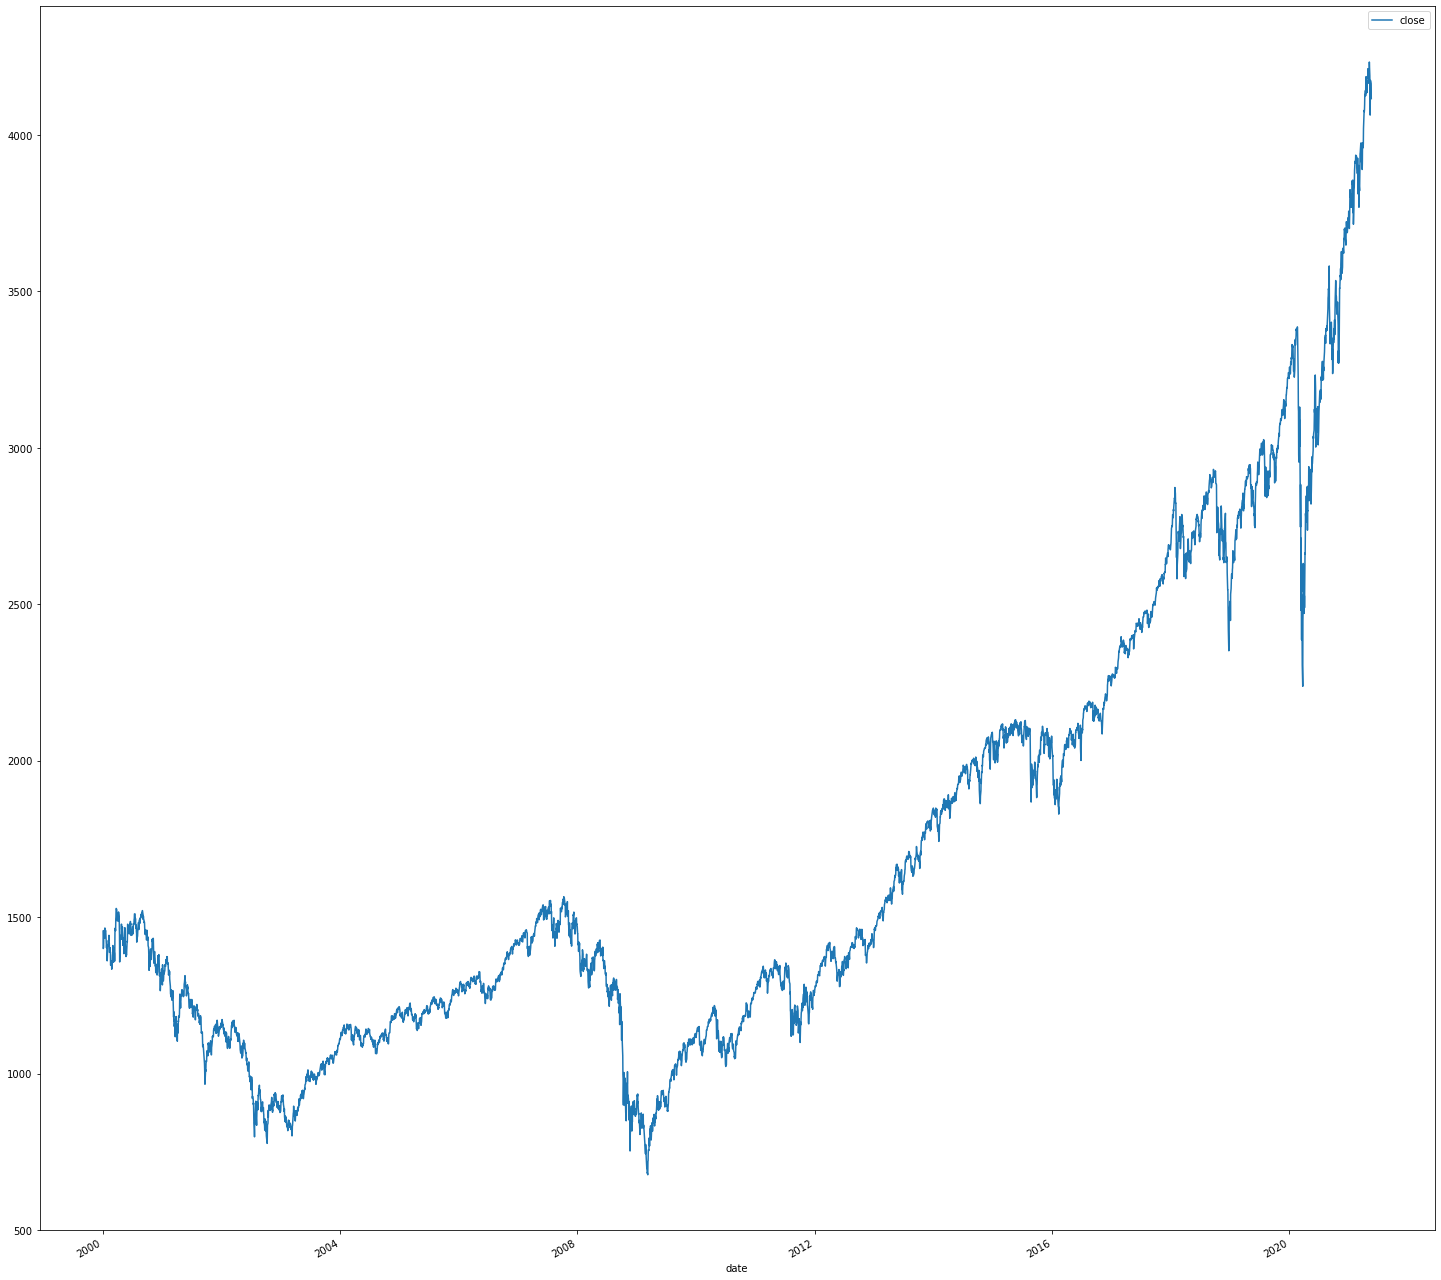

In [74]:
df1.plot('date', 'close', figsize=(25, 25))

In [120]:
df1.head(1).close.values[0]/df1.tail(1).close.values[0]

2.828218413710642

<AxesSubplot:xlabel='date'>

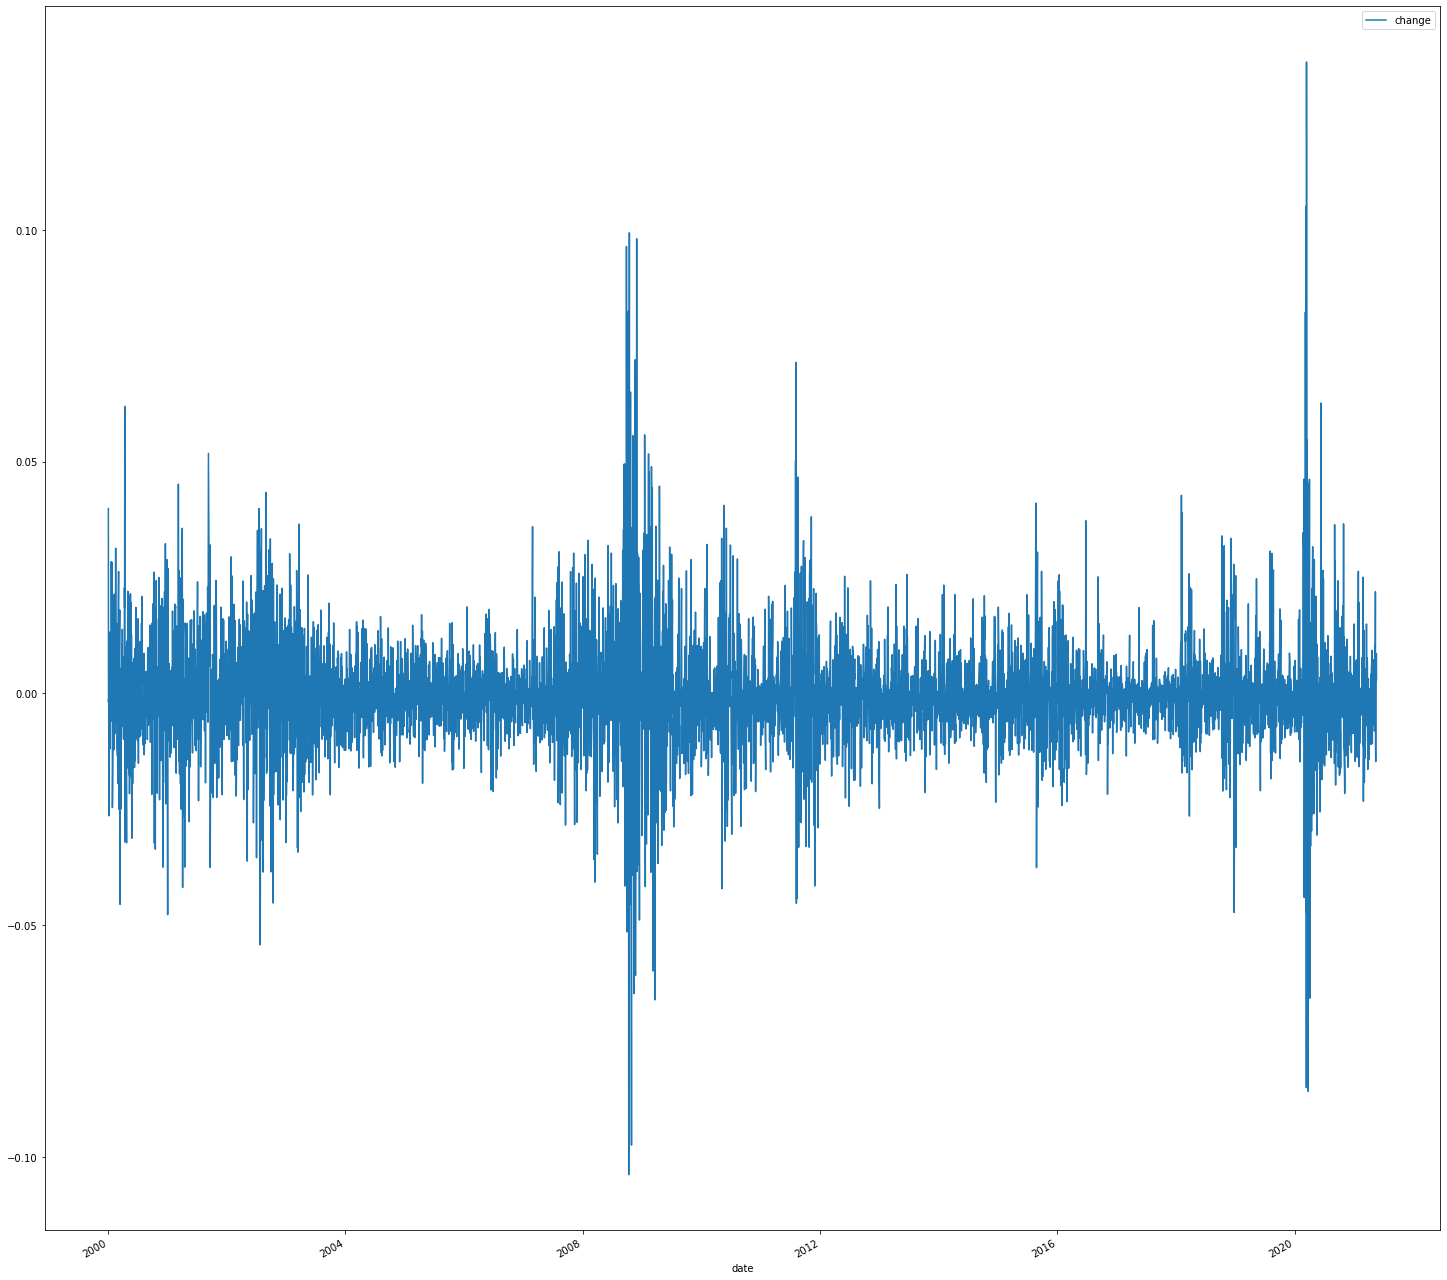

In [88]:
df1.plot('date', 'change', figsize=(25, 25))

In [ ]:
#MoneyTaggedInRatio


In [127]:
#Every day buy one share (dollar average)
costbuy=int(df1.close.sum())
print('costo total: $', costbuy)
earningsbuy=int(df1.close.count()*df.close[0])
print('ganancia total: $', earningsbuy)
changebuy=earningsbuy/costbuy
print('porcentaje: ', changebuy)

costo total: $ 9114819
ganancia total: $ 22138242
porcentaje:  2.4288186084660595


In [128]:
#Every day sells one share (dollar average)
costsell = int(df1.close.tail(1)*df1.close.count())
print('costo total: $', costsell)
earningssell = int(df1.close.sum())
print('ganancia total: $', earningssell)
changesell = earningssell/costsell
print('porcentaje: ', changesell)

costo total: $ 7827628
ganancia total: $ 9114819
porcentaje:  1.1644420250936809


In [130]:
changecomplete = changebuy*changesell
changecomplete

2.8282184590274344

In [125]:
df.shape

(7907, 6)